# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
%matplotlib inline

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join(os.getcwd(), "output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

583

In [85]:
# creating dataframe for city & coordinates to merge with weather data
city_locations = zip (cities, keep_lat, keep_lng)
city_locs_df = pd.DataFrame(city_locations, columns=['City', 'Latitude', 'Longitude'])
city_locs_df

,City,Latitude,Longitude
0,taolanaro,-87.05,62.73
1,barentsburg,73.48,14.18
2,attawapiskat,58.76,-83.79
3,dikson,86.59,68.59
4,barstow,34.79,-117.13
...,...,...,...
578,bonavista,51.58,-52.29
579,ranong,9.48,97.29
580,marsh harbour,29.18,-76.69
581,copiapo,-28.45,-68.77


In [68]:
cities

['kimbe',
 'illoqqortoormiut',
 'atuona',
 'tasiilaq',
 'lebowakgomo',
 'chuy',
 'starosubkhangulovo',
 'upernavik',
 'mataura',
 'georgetown',
 'puerto ayora',
 'rikitea',
 'ajaccio',
 'taolanaro',
 'thinadhoo',
 'barrow',
 'russkaya polyana',
 'pevek',
 'salalah',
 'pringsewu',
 'west bay',
 'luderitz',
 'khatanga',
 'okha',
 'isangel',
 'lazaro cardenas',
 'nenjiang',
 'yellowknife',
 'xining',
 'ushuaia',
 'hilo',
 'yeppoon',
 'kutum',
 'souillac',
 'talara',
 'port macquarie',
 'kruisfontein',
 'port elizabeth',
 'saldanha',
 'sept-iles',
 'punta arenas',
 'imeni poliny osipenko',
 'clovis',
 'hithadhoo',
 'dien bien',
 'nikolskoye',
 'avarua',
 'acari',
 'faanui',
 'mar del plata',
 'cabatuan',
 'micheweni',
 'ilulissat',
 'fort saint john',
 'dalbandin',
 'yumen',
 'miyako',
 'vaini',
 'ancud',
 'calbuco',
 'dikson',
 'lebu',
 'butaritari',
 'zhanaozen',
 'bethel',
 'louisbourg',
 'jamestown',
 'ossora',
 'kaitangata',
 'port lincoln',
 'sao joao da barra',
 'padang',
 'iquique'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
# build api call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# initializing lists for data
temperature = []
humidity = []
cloudy = []
wind_speed = []
save_city = []
save_lat = []
save_lng = []
country = []
save_time = []
save_timezone = []


In [91]:
# Loop through the list of cities
rec_num = 0
# set_num = 1 # not entirely sure there's a benefit to having different sets as it just seems to be blocks of 50

for this_city in cities:
     # Build query URL based on current element in units
    try: 
        query_url = f"{url}appid={weather_api_key}&units={units}&q={this_city}"
 
        rec_num = rec_num + 1

        print(f"Pulling information on {this_city}, Record # {rec_num}")
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get temperature from JSON response & add to the temperature list
        this_temp = weather_json['main']['temp']
        temperature.append(this_temp)

        # get humidity (%) & add to the humidity list
        this_humid = weather_json["main"]["humidity"]
        humidity.append(this_humid)

        # get cloudiness (%) & add to cloudiness list
        this_cloud = weather_json["clouds"]["all"]
        cloudy.append(this_cloud)

        # wind speed (mph) & add to list
        this_wind = weather_json["wind"]["speed"]
        wind_speed.append(this_wind)

        # make sure city goes into list & coordinates
        save_city.append(this_city)
        this_lat = weather_json["coord"]["lat"]
        save_lat.append(this_lat)
        this_lng = weather_json["coord"]["lon"]
        save_lng.append(this_lng)

        # save country & time of data calculation
        this_country = weather_json["sys"]["country"]
        country.append(this_country)
        this_time = weather_json["dt"]
        save_time.append(this_time)
        this_timezone = weather_json["timezone"]
        save_timezone.append(this_timezone)

    
    except KeyError:
        print(f"{this_city} not found. Searching for next city...")
        pass


earching for next city...
Pulling information on teeli, Record # 179
Pulling information on la tuque, Record # 180
Pulling information on arawa, Record # 181
Pulling information on snezhnogorsk, Record # 182
Pulling information on bongor, Record # 183
Pulling information on saint-philippe, Record # 184
Pulling information on sicuani, Record # 185
Pulling information on nikolskoye, Record # 186
Pulling information on khasan, Record # 187
Pulling information on eureka, Record # 188
Pulling information on acaponeta, Record # 189
Pulling information on waitati, Record # 190
Pulling information on cidreira, Record # 191
Pulling information on terrace, Record # 192
Pulling information on grand bank, Record # 193
Pulling information on aksha, Record # 194
Pulling information on ostrovnoy, Record # 195
Pulling information on port hardy, Record # 196
Pulling information on togur, Record # 197
Pulling information on grand haven, Record # 198
Pulling information on salinopolis, Record # 199
Pulli

In [70]:
this_city

'lensk'

In [94]:
len(save_city)

543

In [46]:
output_data_file

'/Users/juliebaker/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv'

In [95]:
# compile data into single csv
output_weather = zip(save_city, temperature, humidity, cloudy, wind_speed)
weather_df = pd.DataFrame(output_weather, columns=['City', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)'])
# merge with earlier data
output_df = pd.merge(city_locs_df, weather_df, on="City", how="inner")

# write csv 
with open (output_data_file, 'w') as wtf:
    output_df.to_csv(output_data_file, encoding='utf-8')

In [96]:
output_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,dikson,86.59,68.59,32.86,80,63,8.08
1,barstow,34.79,-117.13,101.95,19,1,11.88
2,samoylovka,51.25,43.75,66.40,70,0,7.49
3,airai,12.08,146.96,68.32,66,74,4.34
4,celestun,23.43,-91.54,80.15,80,79,8.05


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [97]:
output_df.describe()

,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,17.960755,16.249024,67.839484,70.694291,54.545120,7.795580
std,37.188947,93.636163,13.765430,21.107232,38.258073,5.647845
min,-89.920000,-177.340000,28.450000,9.000000,0.000000,0.000000
25%,-8.040000,-65.000000,58.040000,60.000000,17.500000,3.440000
50%,20.970000,20.740000,69.370000,76.000000,60.000000,6.910000
75%,47.490000,99.600000,78.485000,87.000000,93.500000,10.895000
max,89.870000,179.410000,102.420000,100.000000,100.000000,32.680000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

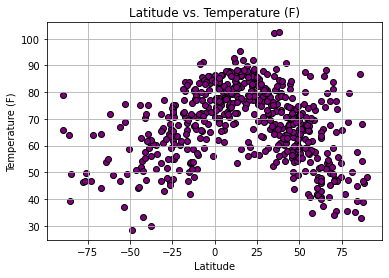

In [106]:
plt.scatter(output_df['Latitude'], output_df['Temperature (F)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

## Latitude vs. Humidity Plot

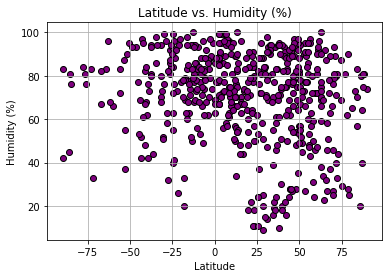

In [107]:
plt.scatter(output_df['Latitude'], output_df['Humidity (%)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

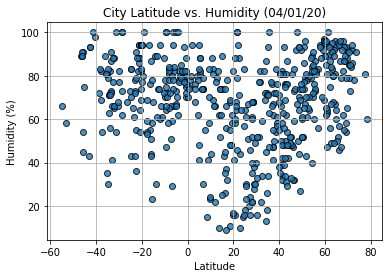

## Latitude vs. Cloudiness Plot

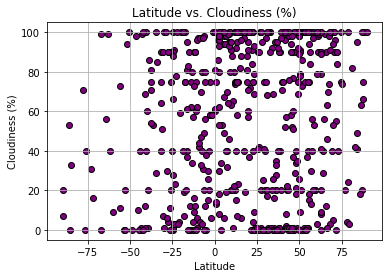

In [108]:
plt.scatter(output_df['Latitude'], output_df['Cloudiness (%)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

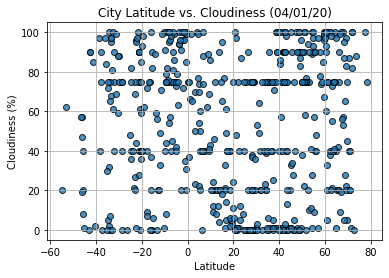

## Latitude vs. Wind Speed Plot

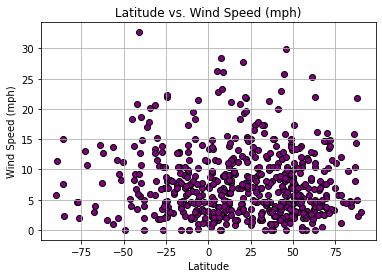

In [109]:
plt.scatter(output_df['Latitude'], output_df['Wind Speed (mph)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

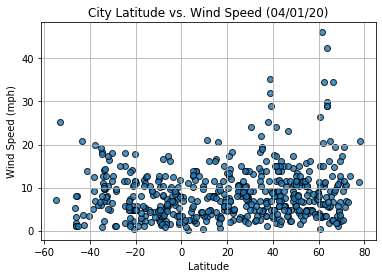

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = weight
y_values = tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,27),fontsize=15,color="red")
plt.annotate(f'r = {round(correlation[0],2)}', (20,24),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The r-value is: 0.46937863826630627


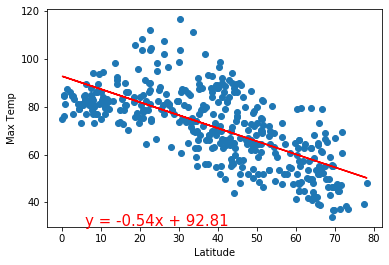

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


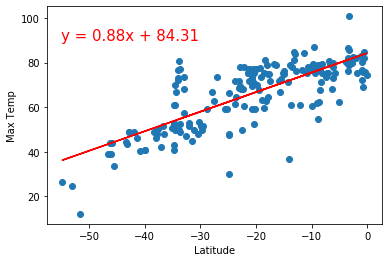

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


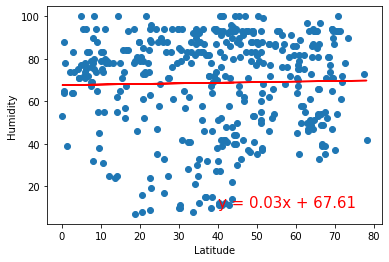

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


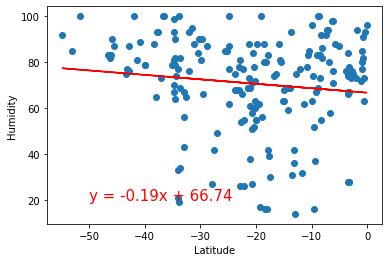

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


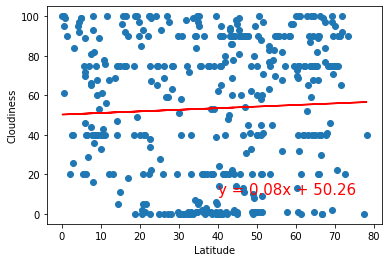

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


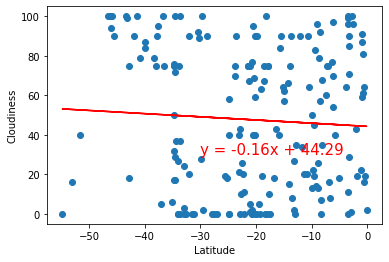

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


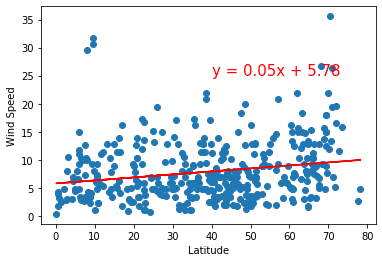

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


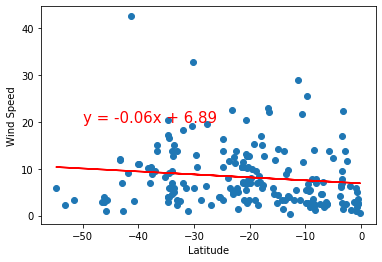